<a href="https://colab.research.google.com/github/Diogo364/-quarentenadados/blob/master/QuarentenaDados_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 01 - QuarentenaDados

## Introdução
----

Esse notebook é referente à resolução dos desafios da **Aula 01** da **#quarentenadados**.

## Lendo os dados do MovieLens


### Importando Base de Filmes

In [0]:
import pandas as pd

In [12]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Importando a base de Avaliação dos filmes

In [13]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


#### Resolução:

Primeiramente iremos agrupar as notas dos filmes por id e iremos utilizar a operação `mean` para sumarizá-los.

In [0]:
mediaFilmes = avaliacoes[['filmeId', 'nota']].groupby('filmeId').agg('mean')

In [15]:
mediaFilmes.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


Em seguida iremos dar o merge entre o DataFrame agrupado de médias com o DataFrame com informações dos filmes para termos o nome dos filmes e a nota média em um mesmo DataFrame.

Obs: Importante ressaltar que o id do filme se encontra no index do agrupamento feito nas linhas acima, portanto teremos que utilizar o parâmetro `right_index=True`

Obs2: Como podemos ter filmes que não tenham nota, ou seja, que não estejam presentes na tabela de notas, temos que utilizar o parâmetro `how='left'`, pois por padrão ele utiliza `how='inner'`, mostrando apenas registros que estejam presentes nas duas tabelas.

In [0]:
filmesComMedia = filmes[['filmeId', 'titulo']].merge(mediaFilmes, left_on='filmeId', right_index=True, how='left')

Por fim pedimos para que ele mostre todos os filmes que não tiveram notas registradas, ou seja, que tenham como conteúdo de `nota = NaN`

In [17]:
filmesComMedia.loc[filmesComMedia.nota.isna()]

,filmeId,titulo,nota
816,1076,"Innocents, The (1961)",NaN
2211,2939,Niagara (1953),NaN
2499,3338,For All Mankind (1989),NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",NaN
3118,4194,I Know Where I'm Going! (1945),NaN
4037,5721,"Chosen, The (1981)",NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",NaN
4598,6849,Scrooge (1970),NaN
4704,7020,Proof (1991),NaN
5020,7792,"Parallax View, The (1974)",NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [18]:
filmesComMedia.head()

,filmeId,titulo,nota
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429


Para resolver esse problema utilizaremos o método rename, passando um dicionário como primeiro parâmetro contendo:

`{'nome_atual': 'nome_desejado}`

Em seguida temos que utilizar o parâmetro `axis=1`, pois por padrão esse método utiliza `axis=0`, renomeando o `index` e não a coluna.

O uso de `inplace=True` serve apenas para não gerar um novo DataFrame, mas sim atualizar o próprio DataFrame utilizado.

In [0]:
filmesComMedia.rename({'nota':'nota_media'}, axis=1, inplace=True)

In [20]:
filmesComMedia.head()

,filmeId,titulo,nota_media
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

Nesse desafio utilizei o método `value_counts` que simplesmente conta o número de vezes que algum elemento aparece em uma série.

Importante ressaltar que o retorno desse método é uma `Serie` onde o `index` é a váriavel que foi contada e o `value` é o número de vezes que ela aparece.

In [21]:
numeroAvaliacoes = avaliacoes['filmeId'].value_counts()
numeroAvaliacoes.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

Agora faremos o merge, bem semelhante ao que tínhamos feito no **Desafio 1**, entre o nosso DataFrame de filmes com médias e a nossa Serie com o número de vezes que cada ID apareceu.

Repare que estamos utilizando um DataFrame com todos os registros de filmes para o merge com um DataFrame contendo apenas os votos de cada file, como já sabemos que temos filmes que não foram votados, é interessante utilizarmos o parâmerto `how='left'` para esse merge também.

Obs: Quando utitlizamos uma serie para fazer o merge com o DataFrame temos que ficar atentos aos nomes das colunas, pois o nome da coluna nova adicionada ao DataFrame é o nome da Série.

In [22]:
filmesVotosMedia = filmesComMedia.merge(numeroAvaliacoes, left_on='filmeId', right_index=True, how='left')
filmesVotosMedia.rename({'filmeId_y': 'votos'}, axis=1, inplace=True)
filmesVotosMedia.drop('filmeId_x', axis=1, inplace=True)
filmesVotosMedia.head()

,titulo,nota_media,votos
0,Toy Story (1995),3.920930,215.0
1,Jumanji (1995),3.431818,110.0
2,Grumpier Old Men (1995),3.259615,52.0
3,Waiting to Exhale (1995),2.357143,7.0
4,Father of the Bride Part II (1995),3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

Para isso existe um método chamado `round`, onde você passa por parâmetro o número de casas decimais que você deseja.

In [23]:
filmesVotosMedia = filmesVotosMedia.round(decimals=2)
filmesVotosMedia.head()

,titulo,nota_media,votos
0,Toy Story (1995),3.92,215.0
1,Jumanji (1995),3.43,110.0
2,Grumpier Old Men (1995),3.26,52.0
3,Waiting to Exhale (1995),2.36,7.0
4,Father of the Bride Part II (1995),3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

### Primeiro teremos que trabalhar com o padrão de string da coluna `'generos'`:<br>
`'genero1|genero2|genero3'`

In [24]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Iremos iterar cada linha do DataFrame e separar o genero em uma lista.

Depois iremos adicionar o id do filme com um dos generos em outro DataFrame, gerando como resultado um DataFrame em que cada registro possui a relação de um filme com um `genero`.

In [25]:
separacaoGeneros = pd.DataFrame(columns=['filmeId', 'genero'])
for indx, row in filmes.iterrows():
  listaGeneros = row.generos.split('|')
  for genero in listaGeneros:
    separacaoGeneros = separacaoGeneros.append({'filmeId': row.filmeId, 'genero': genero}, ignore_index=True)
separacaoGeneros.head() 

,filmeId,genero
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


### Generos únicos de filmes

Para esse momento utilizaremos o DataFrame que nós montamos, filtrando uma coluna juntamente com o método `unique` que retorna uma lista com todos os valores únicos para determinada coluna.

In [26]:
separacaoGeneros.genero.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

Para esse Desafio a utilização do método `value_counts` na coluna `generos` é suficiente.

In [27]:
separacaoGeneros.genero.value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genero, dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

O `matplotlib` é uma das bibliotecas mais utilizadas para o plot de gráficos, porém demanda um controle a nível muito baixo de todas as variáveis, sendo assim preferi utilizar a biblioteca `seaborn`, que utiliza como base o `matplotlib`, mas permite um controle mais símples de alguns parâmetros.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para deixar os plots com um tamanho e contraste melhor utilizarei o `style:'darkgrid'` e aumenterei o tamanho da figura.

In [0]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=18,12

Para gerar um Histograma utilizando variáveis categoricas usando o seaborn temos que utilizar o método `countplot`, onde o primeiro parâmetro é a variável de interesse.

Para esse caso, como se trata de uma variável categórica sem ordem definida - genero de filme não tem ordem - preferi deixar as barras em ordem decrescente, por isso utilizei o parâmetro `order`, que recebe uma lista com a ordem das variáveis categóricas. Utilizei o método `value_counts` pois ele retorna uma série ordenada descendente de aparição de elementos, contendo o nome do elemento no `index`.

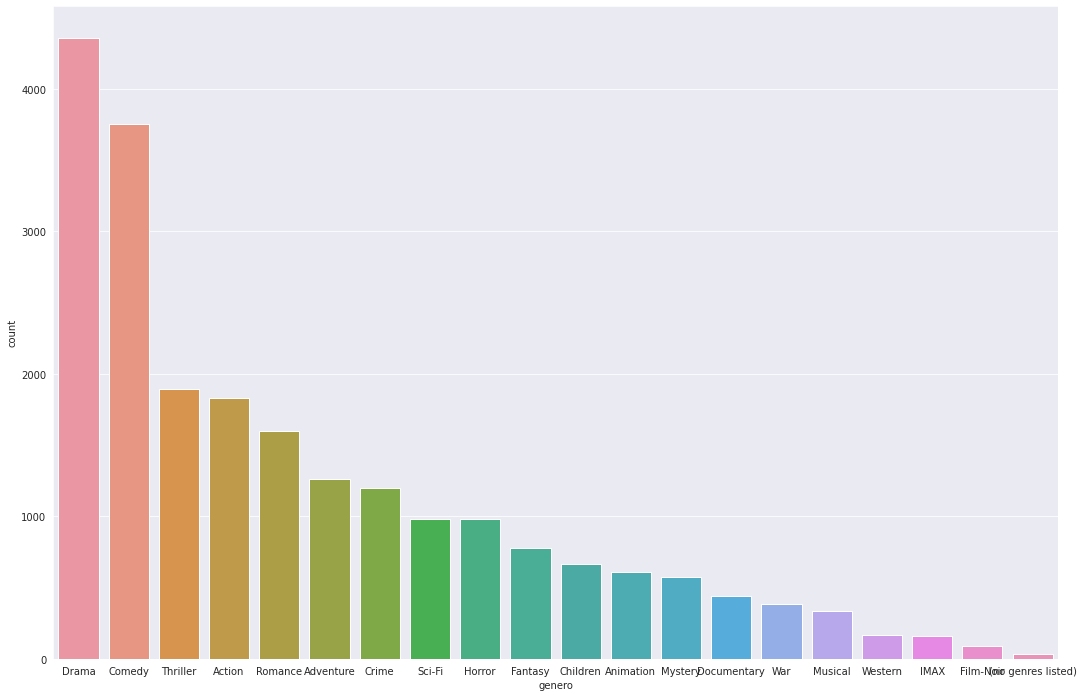

In [30]:
sns.countplot(separacaoGeneros.genero, order=separacaoGeneros.genero.value_counts().index)

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!